__Library Import__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

cleaned = open('B-2_Cleaned.csv')

data = pd.read_csv(cleaned)

df = pd.DataFrame(data)

__Material Balance__

Part 1. Determine Molar Flow Rate of Fuel @ Operating Conditions

In [2]:
# Constants
R = 8.314 

def molar_flow_rate (row):
    P= row[' B-2 Gas Pressure, kPa']
    T= row['UBC Temp, Â°C']
    V= row[' B-2 Gas Flow Rate, mÂ³/h']
    R= 8.3144598
    return P * 1000 * V / (R * (T + 273.15))

df['Fuel molar flow rate (mol/h)']= df.apply(molar_flow_rate, axis=1)
df.head()

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %","B-2 Gas Flow Rate, mÂ³/h","B-2 Gas Pressure, kPa","B-2 Leaving Water Temp, Â°C","B-2 Leaving Water Temp Setpoint, Â°C","B-2 Power, MW","B-2 Water Flow Rate, L/s","UBC Humidity, %RH","UBC Temp, Â°C",Fuel molar flow rate (mol/h)
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,783.652814,135.337414,99.550000,100.0,7.223278,217.681338,98.0,7.0,45532.018730
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,783.963266,135.074718,99.688056,100.0,7.365195,217.737729,98.0,6.9,45477.875622
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,783.874977,135.518425,99.475000,100.0,7.373167,217.605550,98.0,7.0,45605.842364
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,783.052562,135.271423,99.455000,100.0,7.473417,217.514601,97.5,6.9,45491.196448
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,784.171970,135.570503,99.118333,100.0,7.733972,217.740132,97.0,6.8,45673.260170


Part 2. Determine Mole Fractions of Wet Air

In [3]:
# Water Antoine Constants
# Data obtained from Introductory Chemical Engineering Thermodynamics Textbook. Authors: J. Richard Elliott & Carl T. Lira

A = 8.07131
B = 1730.63 # Units: °C
C = 233.426 # Units: °C

# Calculation of Saturated Pressure
Temp = df['UBC Temp, Â°C']
p_sat = 10**(A-(B/(Temp + C))) # Units: mmHg
p_sat *= 133.322 # Converts to Pa

In [4]:
# Constants

# Pressure
P = 101325 # Units: Pa

# Air Component Fractions
y_n2_dry = 0.79
y_o2_dry = 0.21

# Relative Humidity
RH = df.iloc[:, 16].to_numpy() 
RH = RH.astype(np.float32) # Convert to Float

# Create an array for mole fractions of Relative Humidity with consistent size
y_w = np.empty(8628)  

# Calculation of mole fraction of water in wet air
y_w = p_sat/P * RH/100

# Arrays for mole fractions, nitrogen and oxygen
y_1 = np.empty(8628)  
y_n2_wet = np.empty(8628)  
y_o2_wet = np.empty(8628)  

y_1 = y_w + y_n2_dry + y_o2_dry

# Calculation of mole fractions of wet composition
y_w_wet = y_w/y_1
y_n2_wet = y_n2_dry/y_1
y_o2_wet = y_o2_dry/y_1

# print('Mole fraction of Water in wet air = ', y_w_wet)
# print('Mole fraction of Nitrogen in wet air = ', y_n2_wet)
# print('Mole fraction of Oxygen in wet air = ', y_o2_wet)

# Create new columns for the mole fractions of components in wet air
df['Mole Fraction of H2O in wet air'] = y_w_wet
df['Mole Fraction of N2 in wet air'] = y_n2_wet
df['Mole Fraction of O2 in wet air'] = y_o2_wet

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,"B-2 Leaving Water Temp, Â°C","B-2 Leaving Water Temp Setpoint, Â°C","B-2 Power, MW","B-2 Water Flow Rate, L/s","UBC Humidity, %RH","UBC Temp, Â°C",Fuel molar flow rate (mol/h),Mole Fraction of H2O in wet air,Mole Fraction of N2 in wet air,Mole Fraction of O2 in wet air
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,99.550000,100.0,7.223278,217.681338,98.00,7.000,45532.018730,0.009536,0.782466,0.207997
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,99.688056,100.0,7.365195,217.737729,98.00,6.900,45477.875622,0.009471,0.782518,0.208011
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,99.475000,100.0,7.373167,217.605550,98.00,7.000,45605.842364,0.009536,0.782466,0.207997
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,99.455000,100.0,7.473417,217.514601,97.50,6.900,45491.196448,0.009423,0.782555,0.208021
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,99.118333,100.0,7.733972,217.740132,97.00,6.800,45673.260170,0.009312,0.782644,0.208045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,111.449722,115.0,10.949389,216.176613,63.75,-3.100,46329.362216,0.003019,0.787615,0.209366
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,111.625000,115.0,10.517500,216.673695,77.50,-3.600,46603.944561,0.003533,0.787209,0.209258
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,107.366944,115.0,8.949778,217.060618,79.75,-3.950,46893.268706,0.003540,0.787203,0.209257
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,109.081111,115.0,9.855222,217.164711,82.00,-4.625,47007.260259,0.003459,0.787268,0.209274


Part 3. Determine Mole Fractions of Flue Gas using Atomic Carbon, Nitrogen, Oxygen, and Hydrogen Balances & Part 4. Determine the Molar Flow Rate of Air and Flue Gas

In [5]:
# Arrays for our flue gas compositions
y_n2_flue = np.empty(8628)
y_w_flue = np.empty(8628)

# Methane Composition
y_ch4_gas = np.full(8628, 0.95)

# Ethane Composition
y_c2h6_gas = np.full(8628, 0.05)

# Adding incomplete columns into data frame
df['Mole Fraction of CH4 in fuel gas'] = y_ch4_gas
df['Mole Fraction of C2H6 in fuel gas'] = y_c2h6_gas

# Extract data from data frame to use for calculations
a = df['Mole Fraction of O2 in wet air']
b = df['Mole Fraction of H2O in wet air']
c = df['Mole Fraction of CH4 in fuel gas']
d = df['Mole Fraction of C2H6 in fuel gas']
e = df[' B-2 Exhaust O2, %']/100
f = df[' B-2 Exhaust CO2, %']/100
z = df['Fuel molar flow rate (mol/h)']

# Molar Flow of Flue Gas and Air
CH4 = df['Fuel molar flow rate (mol/h)'] * 0.95
C2H6 = df['Fuel molar flow rate (mol/h)'] * 0.05

C_CH4  = CH4
C_C2H6 = C2H6*2

CO2_T = C_CH4 + C_C2H6

df['Molar Flow of Flue Gas (mol/h)']= CO2_T/(data[' B-2 Exhaust CO2, %']/100)

df['Molar Flow of Air (mol/h)'] = df['Molar Flow of Flue Gas (mol/h)'] - df['Fuel molar flow rate (mol/h)']

df.head()

# Atomic Balances
h2o_CH4 = z*0.95*2
h2o_C2H6 = z*0.05*3

df['Mole Fraction of H2O in Flue Gas'] = (h2o_CH4 + h2o_C2H6 + (b * df['Molar Flow of Air (mol/h)']))/df['Molar Flow of Flue Gas (mol/h)']

g = df['Mole Fraction of H2O in Flue Gas']

df['Mole Fraction of N2 in Flue Gas'] = 1 - g - e - f

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,Fuel molar flow rate (mol/h),Mole Fraction of H2O in wet air,Mole Fraction of N2 in wet air,Mole Fraction of O2 in wet air,Mole Fraction of CH4 in fuel gas,Mole Fraction of C2H6 in fuel gas,Molar Flow of Flue Gas (mol/h),Molar Flow of Air (mol/h),Mole Fraction of H2O in Flue Gas,Mole Fraction of N2 in Flue Gas
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,45532.018730,0.009536,0.782466,0.207997,0.95,0.05,4.445120e+05,3.989799e+05,0.218544,0.644013
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,45477.875622,0.009471,0.782518,0.208011,0.95,0.05,4.439776e+05,3.984998e+05,0.218488,0.643945
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,45605.842364,0.009536,0.782466,0.207997,0.95,0.05,4.489793e+05,4.033734e+05,0.216800,0.647566
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,45491.196448,0.009423,0.782555,0.208021,0.95,0.05,4.420697e+05,3.965785e+05,0.219409,0.644961
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,45673.260170,0.009312,0.782644,0.208045,0.95,0.05,4.397656e+05,3.940923e+05,0.221254,0.640740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,46329.362216,0.003019,0.787615,0.209366,0.95,0.05,inf,inf,NaN,NaN
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,46603.944561,0.003533,0.787209,0.209258,0.95,0.05,inf,inf,NaN,NaN
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,46893.268706,0.003540,0.787203,0.209257,0.95,0.05,inf,inf,NaN,NaN
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,47007.260259,0.003459,0.787268,0.209274,0.95,0.05,inf,inf,NaN,NaN


__Void the cells with inf or NaN values__

__Energy Balance__

Part 1. Determine Component and Stream Heat Capacities

In [6]:
# Heat capacity calculator function
def heat_cap(A, B, C, D, temp):
    Cp = A + (B * temp) + (C * (temp ** 2)) + (D * (temp ** 3))
    return Cp

# List of known chemicals
Chemicals = ["Carbon dioxide", "Ethane", "Methane", "Nitrogen", "Oxygen", "Water_g", "Water_l"]

print("Available Chemicals:", Chemicals)

# Heat Capacity coefficients 
coefficients = {
    "Carbon dioxide": [19.8 ,  7.34E-02, -5.60E-05,  1.72E-08],
    "Ethane":         [5.403,  1.78E-01, -6.94E-05,  8.71E-09],
    "Methane":        [19.25,  5.21E-02,  1.20E-05, -1.13E-08],
    "Nitrogen":       [31.15, -1.36E-02,  2.68E-05, -1.17E-08],
    "Oxygen":         [28.11, -3.70E-06,  1.75E-05, -1.07E-08],
    "Water_g":        [32.24,  1.92E-03,  1.06E-05, -3.60E-09],
    "Water_l":        [72.43,  0.01039,  -1.497E-05, 0],
}

temp = 298.15 # Units: K

# Calculate Cp for each chemical
for i in Chemicals:
    
    coeffs = coefficients[i]
    
    Cp = heat_cap(*coeffs, temp)
    
    # Print Cp value for the current chemical
    print(f"Heat capacity of {i} @ {temp}K = {Cp:.2f} J/(mol*K)")


Available Chemicals: ['Carbon dioxide', 'Ethane', 'Methane', 'Nitrogen', 'Oxygen', 'Water_g', 'Water_l']
Heat capacity of Carbon dioxide @ 298.15K = 37.16 J/(mol*K)
Heat capacity of Ethane @ 298.15K = 52.54 J/(mol*K)
Heat capacity of Methane @ 298.15K = 35.55 J/(mol*K)
Heat capacity of Nitrogen @ 298.15K = 29.17 J/(mol*K)
Heat capacity of Oxygen @ 298.15K = 29.38 J/(mol*K)
Heat capacity of Water_g @ 298.15K = 33.66 J/(mol*K)
Heat capacity of Water_l @ 298.15K = 74.20 J/(mol*K)


In [7]:
# Air Stream
a = df['Mole Fraction of N2 in wet air']
b = df['Mole Fraction of O2 in wet air']
c = df['Mole Fraction of H2O in wet air']

UBC_temp = df['UBC Temp, Â°C'] + 273.15

# Calculation
n2 = heat_cap(*coefficients["Nitrogen"], UBC_temp) * a
o2 = heat_cap(*coefficients["Oxygen"], UBC_temp) * b
h2o = heat_cap(*coefficients["Water_l"], UBC_temp) * c

# Total heat capacity of fuel stream
df['Air Heat Capacity, J/(mol*K)'] = n2 + o2 + h2o

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,Mole Fraction of H2O in wet air,Mole Fraction of N2 in wet air,Mole Fraction of O2 in wet air,Mole Fraction of CH4 in fuel gas,Mole Fraction of C2H6 in fuel gas,Molar Flow of Flue Gas (mol/h),Molar Flow of Air (mol/h),Mole Fraction of H2O in Flue Gas,Mole Fraction of N2 in Flue Gas,"Air Heat Capacity, J/(mol*K)"
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,0.009536,0.782466,0.207997,0.95,0.05,4.445120e+05,3.989799e+05,0.218544,0.644013,29.627726
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,0.009471,0.782518,0.208011,0.95,0.05,4.439776e+05,3.984998e+05,0.218488,0.643945,29.624758
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,0.009536,0.782466,0.207997,0.95,0.05,4.489793e+05,4.033734e+05,0.216800,0.647566,29.627726
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,0.009423,0.782555,0.208021,0.95,0.05,4.420697e+05,3.965785e+05,0.219409,0.644961,29.622606
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,0.009312,0.782644,0.208045,0.95,0.05,4.397656e+05,3.940923e+05,0.221254,0.640740,29.617532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,0.003019,0.787615,0.209366,0.95,0.05,inf,inf,NaN,NaN,29.331397
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,0.003533,0.787209,0.209258,0.95,0.05,inf,inf,NaN,NaN,29.354408
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,0.003540,0.787203,0.209257,0.95,0.05,inf,inf,NaN,NaN,29.354700
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,0.003459,0.787268,0.209274,0.95,0.05,inf,inf,NaN,NaN,29.350942


In [8]:
# Fuel Stream
a = df['Mole Fraction of CH4 in fuel gas']
b = df['Mole Fraction of C2H6 in fuel gas']

# Calculation
CH4= heat_cap(*coefficients["Methane"], UBC_temp) * a
C2H6 = heat_cap(*coefficients["Ethane"], UBC_temp) * b

# Total heat capacity of fuel stream
df['Fuel Heat Capacity, J/(mol*K)'] = CH4 + C2H6

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,Mole Fraction of N2 in wet air,Mole Fraction of O2 in wet air,Mole Fraction of CH4 in fuel gas,Mole Fraction of C2H6 in fuel gas,Molar Flow of Flue Gas (mol/h),Molar Flow of Air (mol/h),Mole Fraction of H2O in Flue Gas,Mole Fraction of N2 in Flue Gas,"Air Heat Capacity, J/(mol*K)","Fuel Heat Capacity, J/(mol*K)"
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,0.782466,0.207997,0.95,0.05,4.445120e+05,3.989799e+05,0.218544,0.644013,29.627726,35.312929
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,0.782518,0.208011,0.95,0.05,4.439776e+05,3.984998e+05,0.218488,0.643945,29.624758,35.306888
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,0.782466,0.207997,0.95,0.05,4.489793e+05,4.033734e+05,0.216800,0.647566,29.627726,35.312929
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,0.782555,0.208021,0.95,0.05,4.420697e+05,3.965785e+05,0.219409,0.644961,29.622606,35.306888
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,0.782644,0.208045,0.95,0.05,4.397656e+05,3.940923e+05,0.221254,0.640740,29.617532,35.300847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,0.787615,0.209366,0.95,0.05,inf,inf,NaN,NaN,29.331397,34.702693
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,0.787209,0.209258,0.95,0.05,inf,inf,NaN,NaN,29.354408,34.672481
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,0.787203,0.209257,0.95,0.05,inf,inf,NaN,NaN,29.354700,34.651332
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,0.787268,0.209274,0.95,0.05,inf,inf,NaN,NaN,29.350942,34.610545


In [9]:
# Flue Gas Stream
a = df['Mole Fraction of N2 in Flue Gas']
b = df['Mole Fraction of H2O in Flue Gas']
c = df[' B-2 Exhaust CO2, %'] / 100
d = df[' B-2 Exhaust O2, %'] / 100

flue_temp = df[' B-2 Exhaust Temp, Â°C']

# Calculation
n2 = heat_cap(*coefficients["Nitrogen"], flue_temp) * a
h2o = heat_cap(*coefficients["Water_g"], flue_temp) * b
co2 = heat_cap(*coefficients["Carbon dioxide"], flue_temp) * c
o2 = heat_cap(*coefficients["Oxygen"], flue_temp) * d

# Total heat capacity of fuel stream
df['Flue Gas Heat Capacity, J/(mol*K)'] = n2 + h2o + co2 + o2


In [10]:
# Cold Water
cw_temp = df[' B-2 Entering Water Temp, Â°C'] + 273.15

Cpcw = heat_cap(*coefficients["Water_l"], cw_temp) 

# Total heat capacity of fuel stream
df['Cold Water Heat Capacity, J/(mol*K)'] = Cpcw

# Hot Water
hw_temp = df[' B-2 Leaving Water Temp, Â°C'] + 273.15

Cphw = heat_cap(*coefficients["Water_l"], hw_temp) 

# Total heat capacity of fuel stream
df['Cold Water Heat Capacity, J/(mol*K)'] = Cpcw
df['Hot Water Heat Capacity, J/(mol*K)'] = Cphw

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,Mole Fraction of C2H6 in fuel gas,Molar Flow of Flue Gas (mol/h),Molar Flow of Air (mol/h),Mole Fraction of H2O in Flue Gas,Mole Fraction of N2 in Flue Gas,"Air Heat Capacity, J/(mol*K)","Fuel Heat Capacity, J/(mol*K)","Flue Gas Heat Capacity, J/(mol*K)","Cold Water Heat Capacity, J/(mol*K)","Hot Water Heat Capacity, J/(mol*K)"
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,0.05,4.445120e+05,3.989799e+05,0.218544,0.644013,29.627726,35.312929,30.189362,74.229183,74.222941
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,0.05,4.439776e+05,3.984998e+05,0.218488,0.643945,29.624758,35.306888,30.187442,74.229454,74.222834
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,0.05,4.489793e+05,4.033734e+05,0.216800,0.647566,29.627726,35.312929,30.188082,74.229332,74.222998
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,0.05,4.420697e+05,3.965785e+05,0.219409,0.644961,29.622606,35.306888,30.195884,74.229244,74.223014
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,0.05,4.397656e+05,3.940923e+05,0.221254,0.640740,29.617532,35.300847,30.196110,74.229438,74.223270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,0.05,inf,inf,NaN,NaN,29.331397,34.702693,NaN,74.225980,74.211674
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,0.05,inf,inf,NaN,NaN,29.354408,34.672481,NaN,74.225621,74.211477
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,0.05,inf,inf,NaN,NaN,29.354700,34.651332,NaN,74.226374,74.216018
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,0.05,inf,inf,NaN,NaN,29.350942,34.610545,NaN,74.226721,74.214255


Part 2. Determine Stream Heat Flows

In [11]:
# Constants
cw_temp = df[' B-2 Entering Water Temp, Â°C'] + 273.15 # Cold Water Temp
hw_temp = df[' B-2 Leaving Water Temp, Â°C'] + 273.15 # Hot Water Temp

cw_density = 963.33 #g/L
hw_density = 958.65 #g/L
MW_H2O= 18 #g/mol
H_CH4= -802300 #J/mol
H_C2H6= -1560000 #J/mol
H_vap_H2O= 40630 #J/mol

UBC_temp = df['UBC Temp, Â°C'] + 273.15
temp = 298.15 #K

# Cold Water
cw_flow = df[' B-2 Water Flow Rate, L/s']*cw_density/MW_H2O # Convert L/s to mol/s

qcw = cw_flow*heat_cap(*coefficients['Water_l'], cw_temp)*(cw_temp - temp)

df['Cold Water Heat Flow (J/s)'] = qcw

# Fuel 
f_flow = df['Fuel molar flow rate (mol/h)'] / 3600
f_cp = df['Fuel Heat Capacity, J/(mol*K)']

qf = f_flow * (f_cp*(UBC_temp - temp) + (0.95*H_CH4 + 0.05*H_C2H6))

df['Fuel Heat Flow (J/s)'] = qf

# Air
n2_da = heat_cap(*coefficients["Nitrogen"], UBC_temp) * 0.79
o2_da = heat_cap(*coefficients["Oxygen"], UBC_temp) * 0.21

CpA = n2_da + o2_da
# Dry Air
qad = df['Molar Flow of Air (mol/h)']/3600*(1-df['Mole Fraction of H2O in wet air'])*CpA*(UBC_temp - temp)

# Wet Air
qah2o = df['Molar Flow of Air (mol/h)']/3600*(df['Mole Fraction of H2O in wet air'])*(df['Air Heat Capacity, J/(mol*K)']*(UBC_temp - temp) + H_vap_H2O)
                                       
df['Air Heat Flow (J/s)'] = qad + qah2o

# Hot Water
hw_flow = df[' B-2 Water Flow Rate, L/s']*hw_density/MW_H2O # Convert L/s to mol/s

qhw = hw_flow*heat_cap(*coefficients['Water_l'], hw_temp)*(hw_temp - temp)

df['Hot Water Heat Flow (J/s)'] = qhw

# Flue Gas   
# Dry Gas
qgd = df['Molar Flow of Flue Gas (mol/h)']/3600*(1-df['Mole Fraction of H2O in Flue Gas'])*((n2 + co2 + o2)*((df[' B-2 Exhaust Temp, Â°C'] + 273.15) - temp))
 
# Wet Gas
qgh2o = df['Molar Flow of Flue Gas (mol/h)']/3600*df['Mole Fraction of H2O in Flue Gas']*((h2o)*((df[' B-2 Exhaust Temp, Â°C'] + 273.15) - temp) + H_vap_H2O)

df['Flue Gas Heat Flow (J/s)'] = qgd + qgh2o

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,"Air Heat Capacity, J/(mol*K)","Fuel Heat Capacity, J/(mol*K)","Flue Gas Heat Capacity, J/(mol*K)","Cold Water Heat Capacity, J/(mol*K)","Hot Water Heat Capacity, J/(mol*K)",Cold Water Heat Flow (J/s),Fuel Heat Flow (J/s),Air Heat Flow (J/s),Hot Water Heat Flow (J/s),Flue Gas Heat Flow (J/s)
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,29.627726,35.312929,30.189362,74.229183,74.222941,5.572252e+07,-1.063452e+07,-15315.901813,6.414969e+07,1.302315e+06
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,29.624758,35.306888,30.187442,74.229454,74.222834,5.522547e+07,-1.062191e+07,-15912.507786,6.428504e+07,1.298902e+06
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,29.627726,35.312929,30.188082,74.229332,74.222998,5.542483e+07,-1.065176e+07,-15484.557705,6.406289e+07,1.306473e+06
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,29.622606,35.306888,30.195884,74.229244,74.223014,5.556621e+07,-1.062503e+07,-16049.957413,6.401893e+07,1.300989e+06
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,29.617532,35.300847,30.196110,74.229438,74.223270,5.525634e+07,-1.066759e+07,-16765.836439,6.379575e+07,1.303017e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,29.331397,34.702693,NaN,74.225980,74.211674,6.031222e+07,-1.082511e+07,NaN,7.386388e+07,NaN
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,29.354408,34.672481,NaN,74.225621,74.211477,6.092832e+07,-1.088949e+07,NaN,7.418363e+07,NaN
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,29.354700,34.651332,NaN,74.226374,74.216018,6.002041e+07,-1.095724e+07,NaN,7.066742e+07,NaN
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,29.350942,34.610545,NaN,74.226721,74.214255,5.956043e+07,-1.098416e+07,NaN,7.217098e+07,NaN


Part 3. Determine total qloss

In [16]:
qloss = df['Air Heat Flow (J/s)'] + df['Fuel Heat Flow (J/s)'] + df['Cold Water Heat Flow (J/s)'] - df['Flue Gas Heat Flow (J/s)'] - df['Hot Water Heat Flow (J/s)']

df['qloss (J/s)'] = qloss

print(f'The total qloss = -91.386450540 GJ from our data')

The total qloss = -91.386450540 GJ from our data


__Analysis Plotting__

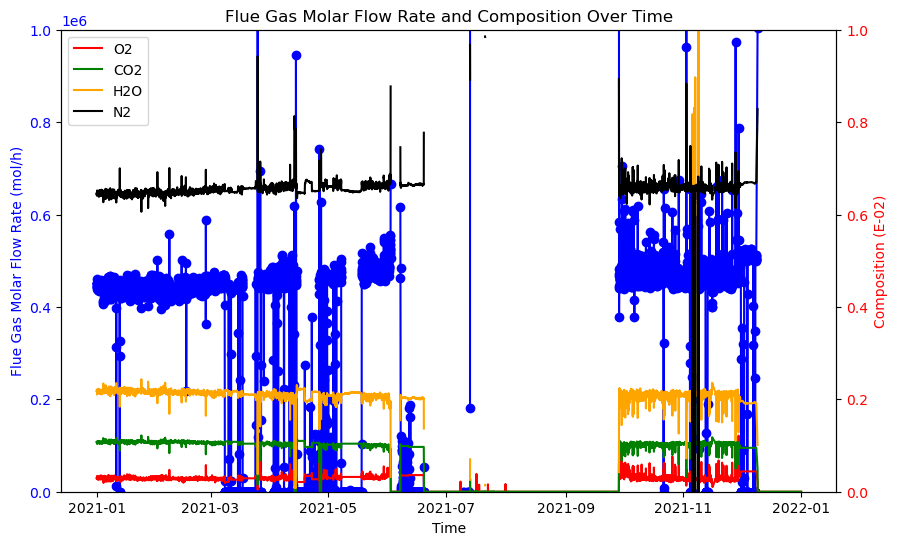

We notice that the trend with molar flow rate of flue gas over time is that it is fairly consistent


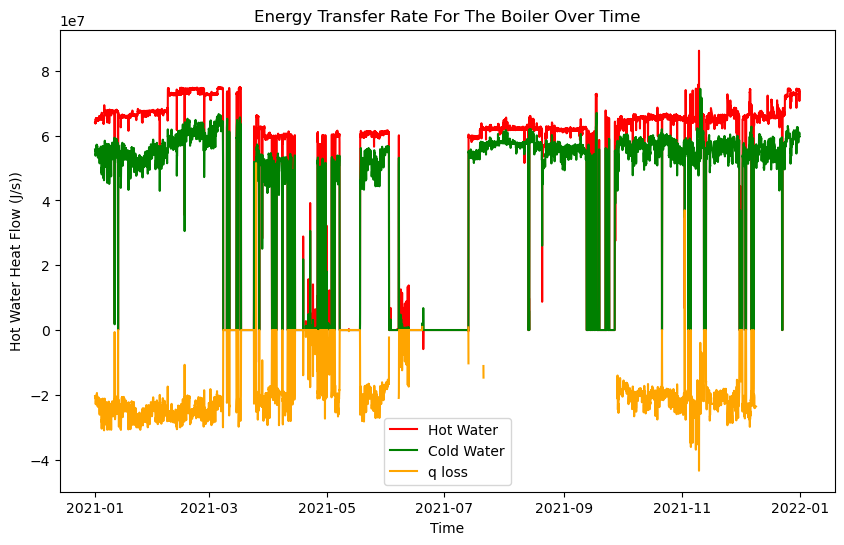

For Hot Water, we notice that it starts off the year average and increases then it decreases assuming as it got cold over the first few months of the year and then decreased during the summer before being completely turned off and then started back up presumably one fall began and increased towards the end of the year

For Cold Water, the trend is the same as for the hot water as it is correlated to each other

For Heat Loss, we see that it is fairly consistent during the early and late months of the year, but it does peak around 1600 hours into the year and ends at around 4000 hours into the year before being shut off


In [13]:
time = pd.to_datetime(df['Timestamp'])
# Flue Gas Flow Rate
plt.figure(figsize=(10, 6))

# Plot the Molar Flow of Flue Gas on primary y-axis
ax1 = plt.gca()  # Gets the current axis (primary y-axis)
ax1.plot(time, df["Molar Flow of Flue Gas (mol/h)"], 'o-b', label='Molar Flow Rate')
ax1.set_xlabel('Time')
ax1.set_ylabel('Flue Gas Molar Flow Rate (mol/h)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_ylim(0, 1e6)  # Set the limit for primary y-axis

ax2 = ax1.twinx()  # Creates a twin y-axis sharing the same x-axis
ax2.plot(time, df[' B-2 Exhaust O2, %']/100, color='red', label='O2')
ax2.plot(time, df[' B-2 Exhaust CO2, %']/100, color='green', label='CO2')
ax2.plot(time, df["Mole Fraction of H2O in Flue Gas"], color='orange', label='H2O')
ax2.plot(time, df["Mole Fraction of N2 in Flue Gas"], color='black', label='N2')
ax2.set_ylabel('Composition (E-02)', color='red')  # Assuming E-02 indicates the scale (e.g., 10^-2)
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend()
ax2.set_ylim(0, 1)

plt.title('Flue Gas Molar Flow Rate and Composition Over Time')


plt.show()

print('We notice that the trend with molar flow rate of flue gas over time is that it is fairly consistent')

# Energy Transfer Rate
# Hot Water
plt.figure(figsize=(10, 6))

plt.plot(time, df["Hot Water Heat Flow (J/s)"], color='red', label='Hot Water')
plt.plot(time, df["Cold Water Heat Flow (J/s)"], color='green', label='Cold Water')
plt.plot(time, df["qloss (J/s)"], color='orange', label='q loss')
plt.title("Energy Transfer Rate For The Boiler Over Time")
plt.xlabel("Time")
plt.ylabel("Hot Water Heat Flow (J/s))")
plt.legend()


plt.show()
          
print('For Hot Water, we notice that it starts off the year average and increases then it decreases assuming as it got cold over the first few months of the year and then decreased during the summer before being completely turned off and then started back up presumably one fall began and increased towards the end of the year')

print('\nFor Cold Water, the trend is the same as for the hot water as it is correlated to each other')

print('\nFor Heat Loss, we see that it is fairly consistent during the early and late months of the year, but it does peak around 1600 hours into the year and ends at around 4000 hours into the year before being shut off')


__Boiler Efficiency__

In [14]:
# Constants
W = df[' B-2 Water Flow Rate, L/s'] * cw_density / MW_H2O 
F = df['Fuel molar flow rate (mol/h)'] / 3600

HFhw = df['Hot Water Heat Flow (J/s)']
HFcw = df['Cold Water Heat Flow (J/s)']

# Enthalpy Calculation
dHc = H_CH4*0.95 + H_C2H6*0.05

n = np.abs((HFhw - HFcw)/(F*dHc)) * 100
                
# Heat consumed in combustion with the fuel
df['Efficiency of Boiler over time'] = n

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,"Flue Gas Heat Capacity, J/(mol*K)","Cold Water Heat Capacity, J/(mol*K)","Hot Water Heat Capacity, J/(mol*K)",Cold Water Heat Flow (J/s),Fuel Heat Flow (J/s),Air Heat Flow (J/s),Hot Water Heat Flow (J/s),Flue Gas Heat Flow (J/s),qloss (J/s),Efficiency of Boiler over time
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,30.189362,74.229183,74.222941,5.572252e+07,-1.063452e+07,-15315.901813,6.414969e+07,1.302315e+06,-2.037932e+07,79.303503
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,30.187442,74.229454,74.222834,5.522547e+07,-1.062191e+07,-15912.507786,6.428504e+07,1.298902e+06,-2.099631e+07,85.356243
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,30.188082,74.229332,74.222998,5.542483e+07,-1.065176e+07,-15484.557705,6.406289e+07,1.306473e+06,-2.061178e+07,81.156555
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,30.195884,74.229244,74.223014,5.556621e+07,-1.062503e+07,-16049.957413,6.401893e+07,1.300989e+06,-2.039479e+07,79.615381
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,30.196110,74.229438,74.223270,5.525634e+07,-1.066759e+07,-16765.836439,6.379575e+07,1.303017e+06,-2.052679e+07,80.111258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,NaN,74.225980,74.211674,6.031222e+07,-1.082511e+07,NaN,7.386388e+07,NaN,NaN,125.332495
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,NaN,74.225621,74.211477,6.092832e+07,-1.088949e+07,NaN,7.418363e+07,NaN,NaN,121.869474
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,NaN,74.226374,74.216018,6.002041e+07,-1.095724e+07,NaN,7.066742e+07,NaN,NaN,97.284706
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,NaN,74.226721,74.214255,5.956043e+07,-1.098416e+07,NaN,7.217098e+07,NaN,NaN,114.946775


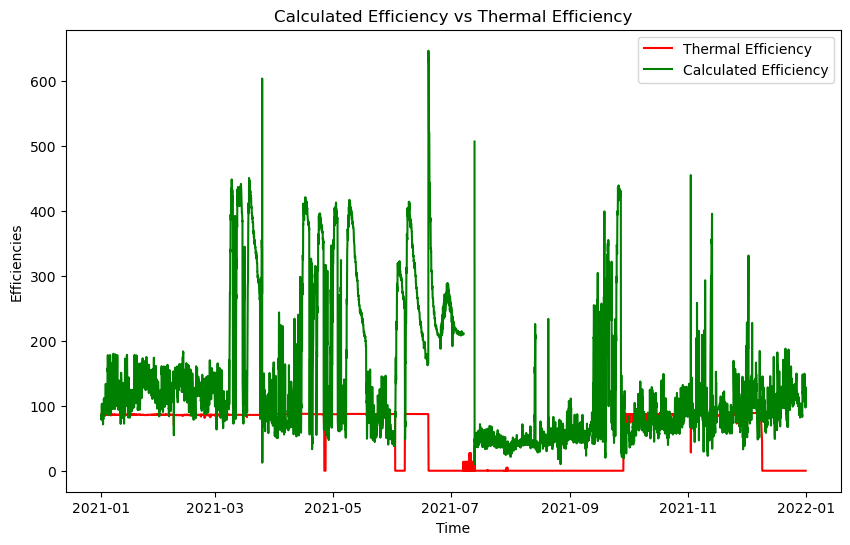

In [19]:
# Efficiency
plt.figure(figsize=(10, 6))

plt.plot(time, df[" B-2 Efficiency, %"], color='red', label='Thermal Efficiency')
plt.plot(time, df["Efficiency of Boiler over time"], color='green', label='Calculated Efficiency')
plt.title("Calculated Efficiency vs Thermal Efficiency")
plt.xlabel("Time")
plt.ylabel("Efficiencies")
plt.legend()

As we can see, for some reason our efficiencies reach 600%. But other than that, the calculated values which are not above 100, are all higher than the the thermal efficiency values from Skyspark

__Emissions Estimates__

In [20]:
# Calculation
e_fac = 5E01 * 0.0000353147 # Convert to lb/m^3
conversion = 1.88E-03 # Units: (g/m3)/ppmv

#m^3/h * h * lb/m^3
NOx = df[' B-2 Gas Flow Rate, mÂ³/h'] * e_fac # Units: lb/h
NOx *= 453.6 # Units: g/h

NOx /= df[' B-2 Gas Flow Rate, mÂ³/h'] # Units: g/m^3

# Sensor data
df['NOx Calculated (g/m^3)'] = NOx

NOx_sens = df[' B-2 Exhaust NOx, ppm'] * conversion

df['NOx Sensor (g/m^3)'] = NOx_sens

# Add all the new columns to a new and updated data file
df.to_csv('B-2_Cleaned_Final.csv', index=False) 

df

,Timestamp,"B-2 Efficiency, %","B-2 Energy, MWh","B-2 Entering Water Temp, Â°C","B-2 Exhaust CO, ppm","B-2 Exhaust CO2, %","B-2 Exhaust NOx, ppm","B-2 Exhaust O2, %","B-2 Exhaust Temp, Â°C","B-2 Firing Rate, %",...,Cold Water Heat Flow (J/s),Fuel Heat Flow (J/s),Air Heat Flow (J/s),Hot Water Heat Flow (J/s),Flue Gas Heat Flow (J/s),qloss (J/s),Efficiency of Boiler over time,NOx Calculated (ppmv),NOx Sensor (g/m^3),NOx Calculated (g/m^3)
0,1/1/2021 0:00,86.700003,0.00000,89.436555,5.827500,10.755306,23.517778,2.989000,110.155556,30.938333,...,5.572252e+07,-1.063452e+07,-15315.901813,6.414969e+07,1.302315e+06,-2.037932e+07,79.303503,0.800937,0.044213,0.800937
1,1/1/2021 1:00,86.699999,0.00000,88.844997,1.314722,10.755444,23.393333,3.001222,109.502778,30.965556,...,5.522547e+07,-1.062191e+07,-15912.507786,6.428504e+07,1.298902e+06,-2.099631e+07,85.356243,0.800937,0.043979,0.800937
2,1/1/2021 2:00,86.699999,0.00000,89.114498,1.839444,10.665556,24.076389,2.897889,109.861389,31.316389,...,5.542483e+07,-1.065176e+07,-15484.557705,6.406289e+07,1.306473e+06,-2.061178e+07,81.156555,0.800937,0.045264,0.800937
3,1/1/2021 3:00,86.550001,0.00000,89.304998,7.601111,10.805028,23.906667,2.757972,110.893889,31.871944,...,5.556621e+07,-1.062503e+07,-16049.957413,6.401893e+07,1.300989e+06,-2.039479e+07,79.615381,0.800937,0.044945,0.800937
4,1/1/2021 4:00,86.649998,45.59375,88.879999,4.368611,10.905111,23.918889,2.895528,111.024722,32.438611,...,5.525634e+07,-1.066759e+07,-16765.836439,6.379575e+07,1.303017e+06,-2.052679e+07,80.111258,0.800937,0.044968,0.800937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,12/31/2021 19:00,0.000000,89.09375,95.232494,0.000000,0.000000,0.000000,0.000000,0.000000,43.292778,...,6.031222e+07,-1.082511e+07,NaN,7.386388e+07,NaN,NaN,125.332495,0.800937,0.000000,0.800937
8624,12/31/2021 20:00,0.000000,0.00000,95.787498,0.000000,0.000000,0.000000,0.000000,0.000000,42.349444,...,6.092832e+07,-1.088949e+07,NaN,7.418363e+07,NaN,NaN,121.869474,0.800937,0.000000,0.800937
8625,12/31/2021 21:00,0.000000,26.90625,94.607669,0.000000,0.000000,0.000000,0.000000,0.000000,43.938611,...,6.002041e+07,-1.095724e+07,NaN,7.066742e+07,NaN,NaN,97.284706,0.800937,0.000000,0.800937
8626,12/31/2021 22:00,0.000000,2.50000,94.040779,0.000000,0.000000,0.000000,0.000000,0.000000,44.666111,...,5.956043e+07,-1.098416e+07,NaN,7.217098e+07,NaN,NaN,114.946775,0.800937,0.000000,0.800937


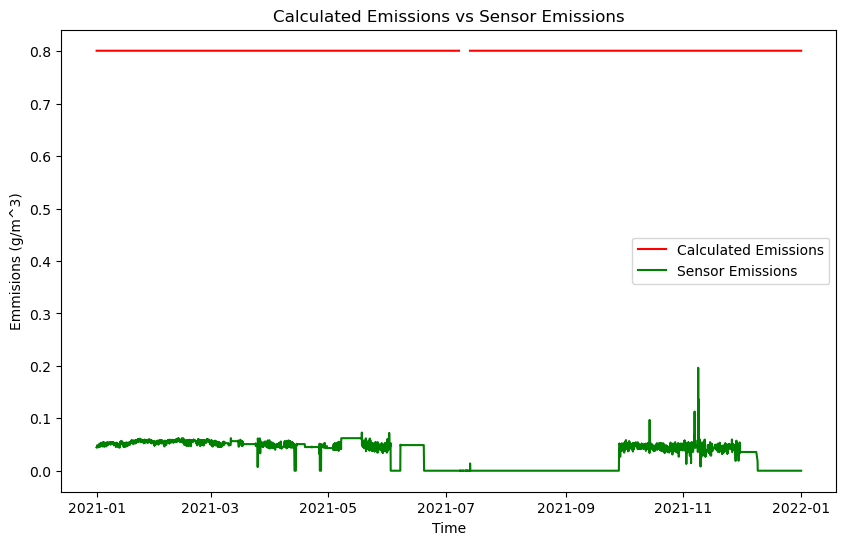

In [21]:
# Emission
plt.figure(figsize=(10, 6))

plt.plot(time, df["NOx Calculated (g/m^3)"], color='red', label='Calculated Emissions')
plt.plot(time, df["NOx Sensor (g/m^3)"], color='green', label='Sensor Emissions')
plt.title("Calculated Emissions vs Sensor Emissions")
plt.xlabel("Time")
plt.ylabel("Emmisions (g/m^3)")
plt.legend()

As we can see, the calculated emissions are generally much higher than that of the emissions detected from the sensor emissions.